# EfficientNet Implementation   - EfficientNet- B0

## Training a Custom  Model from scratch

![image.png](attachment:image.png)

# Data Pre Processing

In [ ]:
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os



In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
%cd vio_Dataset

/content/gdrive/MyDrive/vio_Dataset


In [ ]:
%cd voil_data_frame

/content/gdrive/MyDrive/vio_Dataset/voil_data_frame


In [ ]:
%cd Real life violence dataset

[Errno 2] No such file or directory: 'Real life violence dataset'
/content/gdrive/MyDrive/vio_Dataset/voil_data_frame/Real life violence dataset


In [ ]:
dataset_path = os.listdir('/content/gdrive/MyDrive/vio_Dataset/voil_data_frame/Real life violence dataset')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['violence', 'nonviolence']
Types of classes labels found:  2


In [ ]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('/content/gdrive/MyDrive/vio_Dataset/voil_data_frame/Real life violence dataset' + '/' +item)
 #print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    #print(class_labels[:5])

In [ ]:

# Build a dataframe        
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

     Labels                                   image
0  violence  dataset_path/violence/V_704_000005.jpg
1  violence  dataset_path/violence/V_710_000002.jpg
2  violence  dataset_path/violence/V_722_000002.jpg
3  violence  dataset_path/violence/V_709_000004.jpg
4  violence  dataset_path/violence/V_718_000007.jpg
            Labels                                        image
11318  nonviolence  dataset_path/nonviolence/NV_1058_000006.jpg
11319  nonviolence  dataset_path/nonviolence/NV_1056_000003.jpg
11320  nonviolence  dataset_path/nonviolence/NV_1049_000004.jpg
11321  nonviolence  dataset_path/nonviolence/NV_1057_000007.jpg
11322  nonviolence  dataset_path/nonviolence/NV_1064_000005.jpg


In [ ]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  11323
violence       5867
nonviolence    5456
Name: Labels, dtype: int64


In [ ]:
import cv2
path = '/content/gdrive/MyDrive/vio_Dataset/voil_data_frame/Real life violence dataset/'
dataset_path = os.listdir('/content/gdrive/MyDrive/vio_Dataset/voil_data_frame/Real life violence dataset')

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [ ]:
images = np.array(images)
images = images.astype('float32') / 255.0
images.shape

(11323, 224, 224, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['violence' 'violence' 'violence' ... 'nonviolence' 'nonviolence'
 'nonviolence']
[1 1 1 ... 0 0 0]


In [ ]:

y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
#print(Y[:5])
#print(Y[35:])
print(Y)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.2, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)



(1606, 224, 224, 3)
(1606, 2)
(402, 224, 224, 3)
(402, 2)



# EfficientNet Implementation :



In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 2
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# Using model without transfer learning

outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [ ]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

model.summary()

hist = model.fit(train_x, train_y, epochs=40, verbose=2)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 2)                4052133   
                                                                 
Total params: 4,052,133
Trainable params: 4,010,110
Non-trainable params: 42,023
_________________________________________________________________
Epoch 1/40
51/51 - 24s - loss: 0.1581 - accuracy: 0.9707 - 24s/epoch - 464ms/step
Epoch 2/40
51/51 - 15s - loss: 0.0566 - accuracy: 0.9776 - 15s/epoch - 298ms/step
Epoch 3/40
51/51 - 15s - loss: 0.0824 - accuracy: 0.9658 - 15s/epoch - 299ms/step
Epoch 4/40
51/51 - 15s - loss: 0.0271 - accuracy: 0.9888 - 15s/epoch - 296ms/step
Epoch 5/40
51/51 - 15s - loss: 0.0135 - accuracy: 0.9950 - 15s/epoch - 293ms/step
Epoch 6/40
51/51 - 15s - loss:

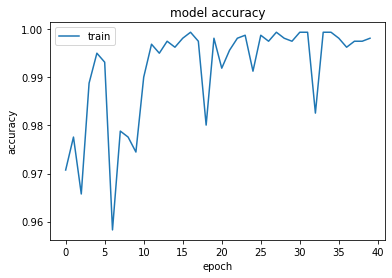

In [ ]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [ ]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

13/13 [==============================] - 3s 67ms/step - loss: 0.0718 - accuracy: 0.9851
Loss = 0.07177146524190903
Test Accuracy = 0.9850746393203735


### Accuracy and **recall** 

In [ ]:
preds = model.evaluate(test_x, test_y)
print ("Test loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(test_x)
y_pred_classes = [np.argmax(element) for element in y_pred]

In [ ]:
import numpy as np
rounded_labels=np.argmax(test_y, axis=1)

In [ ]:
print(rounded_labels)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(test_x)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(rounded_labels, y_pred_classes))

# Testing Efficient Model On Unseen data

Input image shape: (1, 224, 224, 3)


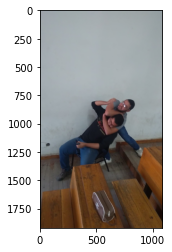

In [ ]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = '/content/test.jpg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [ ]:
preds=model.predict(x)
preds     # probabilities for being in each of the 3 classes

1/1 [==============================] - 2s 2s/step


array([[0., 1.]], dtype=float32)

In [ ]:

# Cuda and cudnn is installed for this tensorflow version. So we can see GPU is enabled
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_performance =model.fit(train_x, train_y, epochs=30, verbose=2)
    cpu_performance

In [ ]:

%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    gpu_performance =model.fit(train_x, train_y, epochs=10, verbose=2)
    gpu_performance

Epoch 1/10
9/9 - 3s - loss: 1.9933e-05 - accuracy: 1.0000 - 3s/epoch - 306ms/step
Epoch 2/10
9/9 - 3s - loss: 1.3731e-06 - accuracy: 1.0000 - 3s/epoch - 307ms/step
Epoch 3/10
9/9 - 3s - loss: 4.4198e-04 - accuracy: 1.0000 - 3s/epoch - 287ms/step
Epoch 4/10
9/9 - 3s - loss: 4.2857e-06 - accuracy: 1.0000 - 3s/epoch - 287ms/step
Epoch 5/10
9/9 - 3s - loss: 1.2035e-06 - accuracy: 1.0000 - 3s/epoch - 287ms/step
Epoch 6/10
9/9 - 3s - loss: 2.1607e-05 - accuracy: 1.0000 - 3s/epoch - 290ms/step
Epoch 7/10
9/9 - 3s - loss: 8.4406e-05 - accuracy: 1.0000 - 3s/epoch - 287ms/step
Epoch 8/10
9/9 - 3s - loss: 0.0029 - accuracy: 0.9964 - 3s/epoch - 288ms/step
Epoch 9/10
9/9 - 3s - loss: 1.4447e-05 - accuracy: 1.0000 - 3s/epoch - 290ms/step
Epoch 10/10
9/9 - 3s - loss: 0.0034 - accuracy: 0.9964 - 3s/epoch - 288ms/step
41.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
# CPU completed the training in 7 min 53 Seconds and GPU did that training in 25.6 seconds